## Swan Consulting - Demographic of Churners - Test

Exploring the demographic of customers who churned in the Swan Consulting customer dataset 

### 1.1 Importing the packages and data 

In [20]:
#Getting imports 
import pandas as pd 
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [21]:
#Reading the file and creating a copy to work from 
swan_og = pd.read_excel("1 - Project Data.xlsx")
swan = swan_og.copy()

### 1.2 Data Cleaning 

In [22]:
#Dropping the columns that have the same value for every column 
swan.drop(columns=['Count', 'Country', 'State'], inplace = True)

In [23]:
swan.head()

,CustomerID,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [24]:
swan = swan.drop(swan[swan['Total Charges'] == ' '].index)
swan['Total Charges'].astype('int')

0        108
1        151
2        820
3       3046
4       5036
        ... 
7038    1419
7039    1990
7040    7362
7041     346
7042    6844
Name: Total Charges, Length: 7032, dtype: int32

In [25]:
products = ['Product dissatisfaction', 'Network reliability', 'Lack of self-service on Website', 'Limited range of services', 'Long distance charges', 'Lack of affordable download/upload speed' ]
swan_services = ['Attitude of support person', 'Attitude of service provider',   'Price too high', 'Service dissatisfaction',  'Extra data charges', 'Poor expertise of phone support', 'Poor expertise of online support']
competitor_services = ['Competitor offered higher download speeds', 'Competitor offered more data', 'Competitor made better offer', 'Competitor had better devices']

def churn_reason(reason):
    if reason in products:
        return 'Issue with products' 
    elif reason in swan_services:
        return 'Issue with Swan Services' 
    elif reason in competitor_services:
        return 'Competitor offered better services'
    else:
        return 'Other'
    
swan['Churn Category'] = swan['Churn Reason'].apply(churn_reason)

In [26]:
# Creating a dataframe with just the details of customers who churned 
churners = swan[swan['Churn Value'] == 1]
len(churners)

non_churners = swan[swan['Churn Value'] == 0]

In [27]:
#Creating a dataframe the counts of each city, then plotting this 
city_counts_all = pd.DataFrame(swan.City.value_counts()).reset_index().rename(columns={'index':'City', 'City' : 'Count'})                                                  
city_counts_churn = pd.DataFrame(churners.City.value_counts()).reset_index().rename(columns={'index':'City', 'City' : 'Count'})           

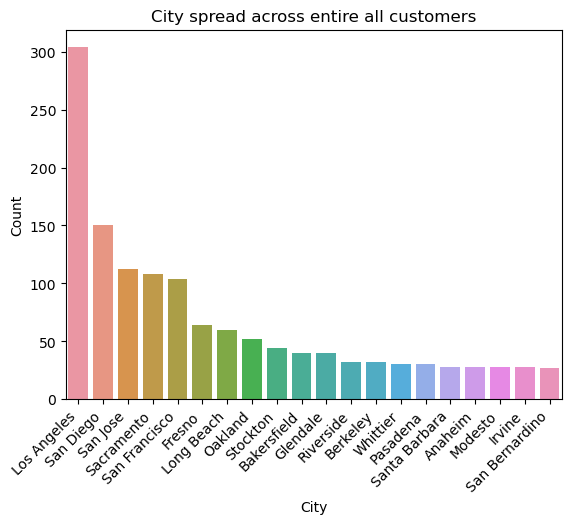

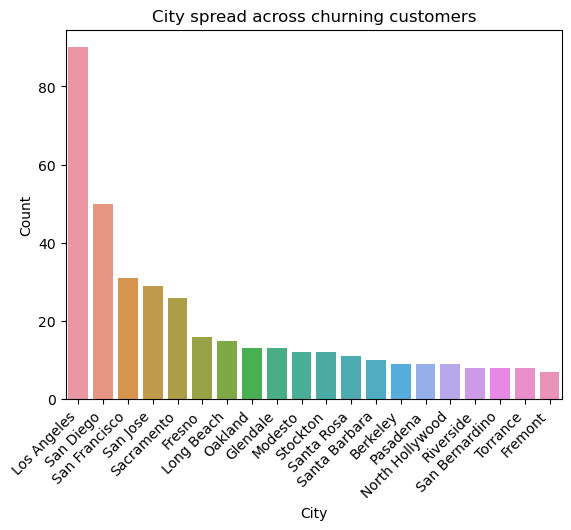

In [28]:
sns.barplot(x = 'City', y = 'Count', data = city_counts_all.head(20))
plt.xticks(horizontalalignment = 'right', 
          rotation = 45)
plt.title('City spread across entire all customers')
plt.show()

plt.clf()

sns.barplot(x = 'City', y = 'Count', data = city_counts_churn.head(20))
plt.xticks(horizontalalignment = 'right', 
          rotation = 45)
plt.title('City spread across churning customers')
plt.show()

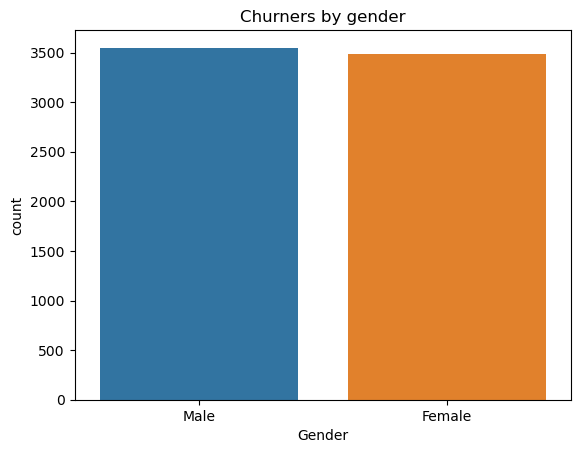

In [29]:
#Viewing churners by gender 
sns.countplot(x='Gender', data=swan)
plt.title('Churners by gender')
plt.show()

In [30]:
high_diff = ['Online Security', 'Partner', 'Dependents', 'Online Backup', 'Device Protection', 'Tech Support','Streaming TV', 'Streaming Movies', 'Paperless Billing']
yes_no_columns=['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines',
                    'Online Security', 'Online Backup' 'Device Protection', 
                    'Tech Support', 'Streaming TV', 'Streaming Movies', 'Paperless Billing']

<Figure size 640x480 with 0 Axes>

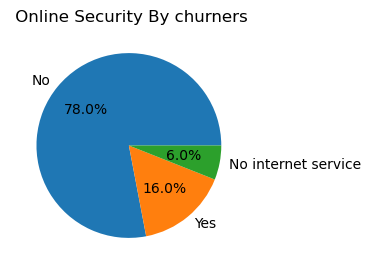

<Figure size 640x480 with 0 Axes>

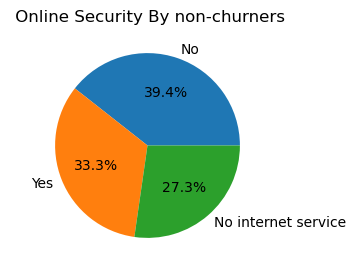

<Figure size 640x480 with 0 Axes>

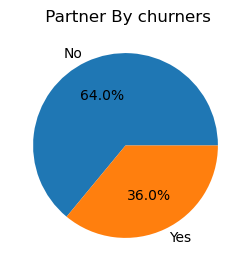

<Figure size 640x480 with 0 Axes>

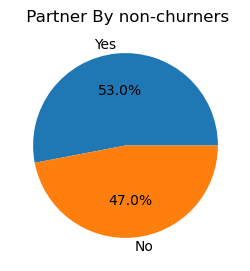

<Figure size 640x480 with 0 Axes>

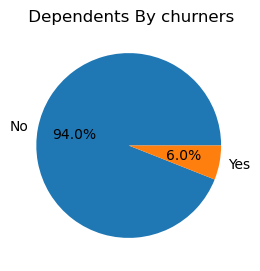

<Figure size 640x480 with 0 Axes>

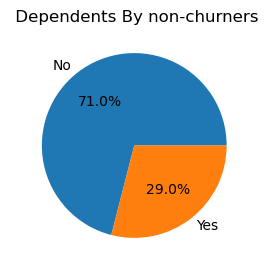

<Figure size 640x480 with 0 Axes>

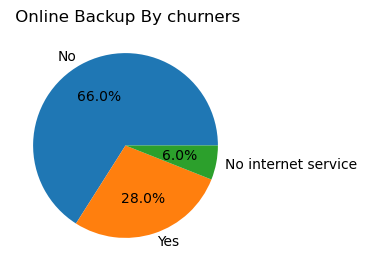

<Figure size 640x480 with 0 Axes>

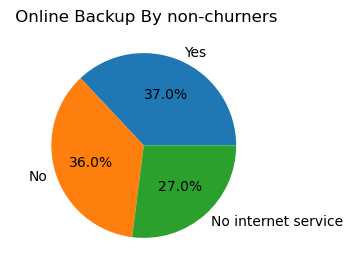

<Figure size 640x480 with 0 Axes>

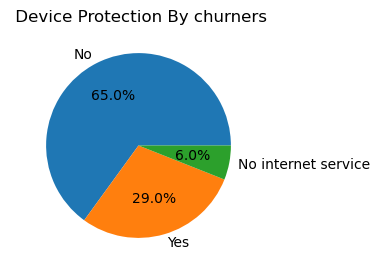

<Figure size 640x480 with 0 Axes>

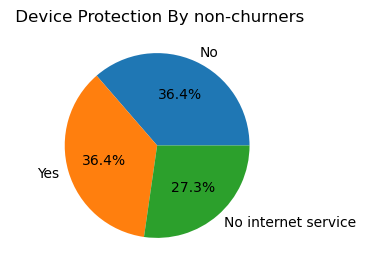

<Figure size 640x480 with 0 Axes>

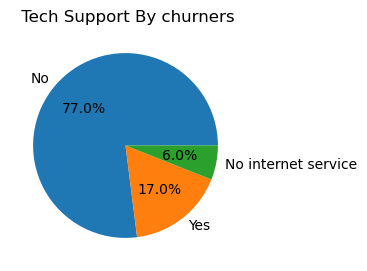

<Figure size 640x480 with 0 Axes>

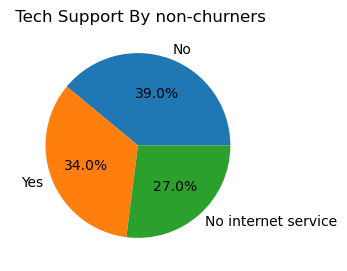

<Figure size 640x480 with 0 Axes>

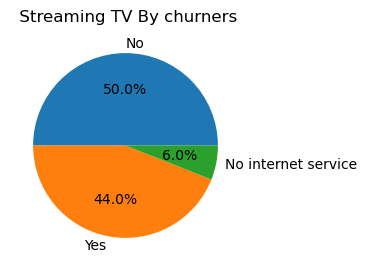

<Figure size 640x480 with 0 Axes>

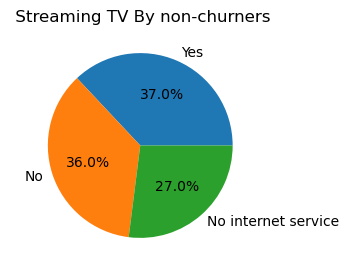

<Figure size 640x480 with 0 Axes>

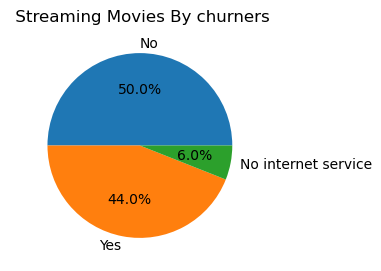

<Figure size 640x480 with 0 Axes>

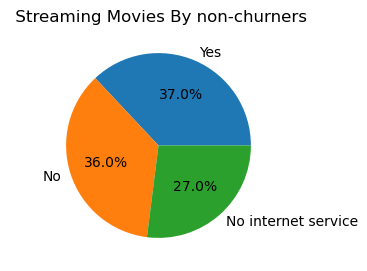

<Figure size 640x480 with 0 Axes>

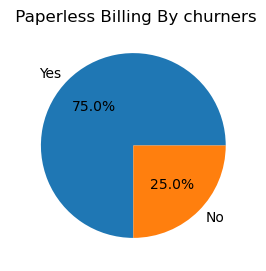

<Figure size 640x480 with 0 Axes>

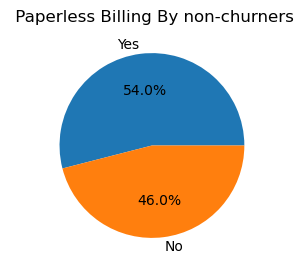

In [31]:
for col in high_diff:
    plt.clf()
    plt.figure(figsize = (10, 3)) 
    label = churners[col].value_counts(normalize = True).index
    size = round(churners[col].value_counts(normalize = True), 2).values
    plt.pie(size, labels = label, autopct='%1.1f%%')
    plt.title(f' {col} By churners')
    plt.show()
    
    plt.clf()
    plt.figure(figsize = (10, 3)) 
    label = non_churners[col].value_counts(normalize = True).index
    size = round(non_churners[col].value_counts(normalize = True), 2).values
    plt.pie(size, labels = label, autopct='%1.1f%%')
    plt.title(f' {col} By non-churners')
    plt.show()


In [32]:
#Looking at LA churners 
churn_LA_reasons = churners[churners['City'] == 'Los Angeles'].groupby('Churn Category')[['CustomerID']].count().reset_index().rename(columns = {'CustomerID' : 'Count'})

In [33]:
labels = churn_LA_reasons['Churn Category']
sizes = churn_LA_reasons['Count']

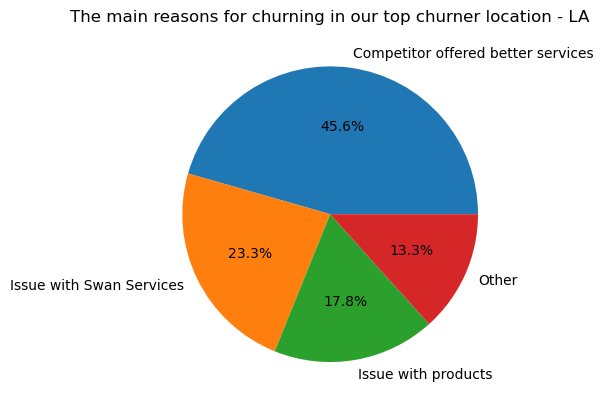

In [34]:
plt.pie(sizes, labels = labels, autopct='%1.1f%%' )
plt.title('The main reasons for churning in our top churner location - LA')
plt.show()

In [35]:
#churn_cat_count.

In [36]:
# Comparing the above to the trend for the entire churner group 
churn_cat_count = pd.DataFrame(swan['Churn Category'].value_counts()).reset_index().rename(columns = {'index' : 'Churn Category',
                                                                                                     'Churn Category' : 'Count'})
churn_cat_count.head()

churn_cat_count.columns

Index(['Churn Category', 'Count'], dtype='object')

In [37]:
labels = churn_cat_count['Churn Category']
sizes = churn_cat_count['Count']

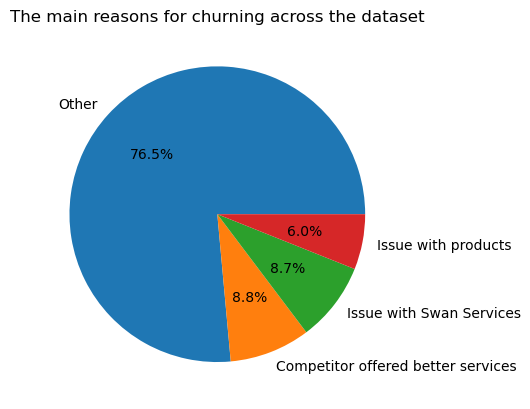

In [38]:
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('The main reasons for churning across the dataset')
plt.show()

In [39]:
# Looking at the spread of 

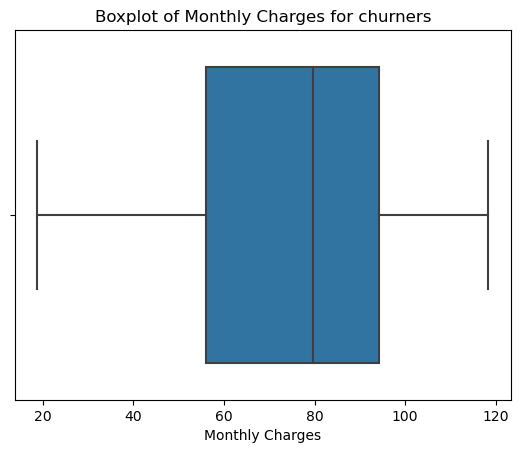

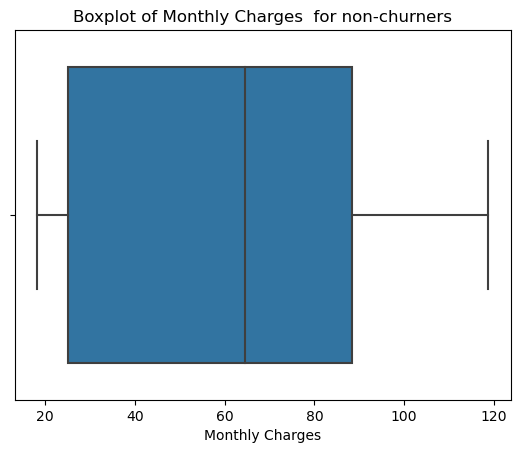

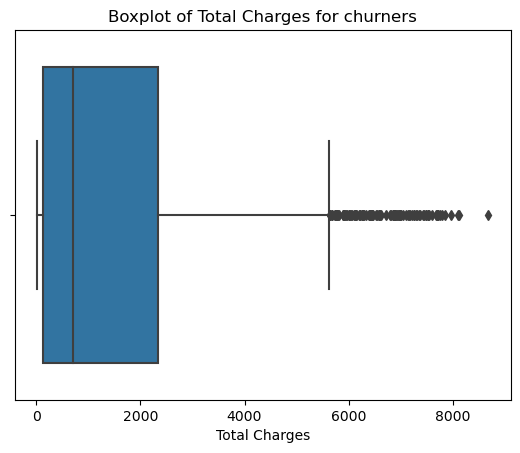

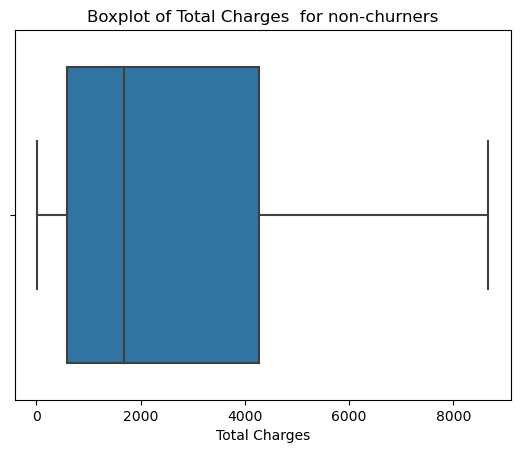

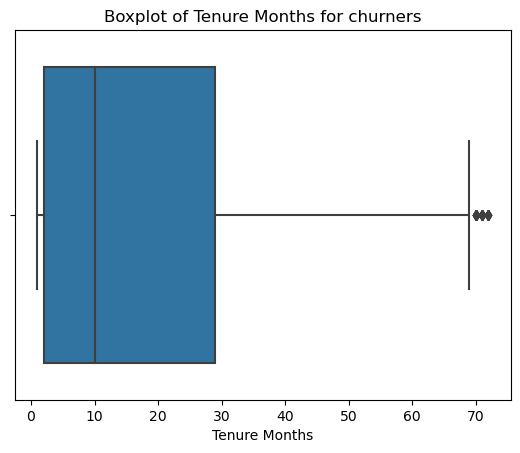

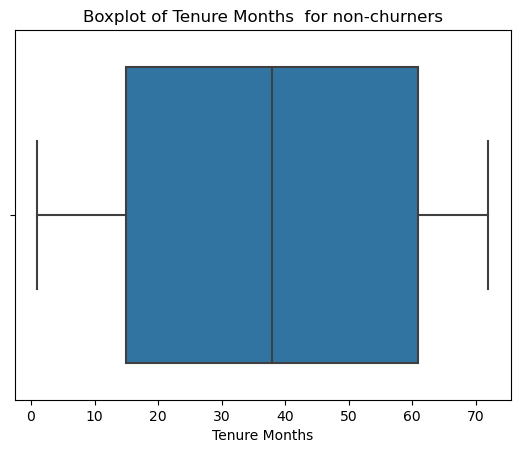

In [40]:
num_cols = [ 'Monthly Charges', 'Total Charges', 'Tenure Months']
for col in num_cols :
    plt.clf()
    sns.boxplot(data = churners, x = col)
    plt.title(f'Boxplot of {col} for churners' )
    plt.show()
    
    plt.clf()
    sns.boxplot(data = non_churners, x = col)
    plt.title(f'Boxplot of {col}  for non-churners' )
    plt.show()

In [41]:
rob = RobustScaler() ## Initial scaler
rob.fit(swan['Total Charges'])

swan['Scaled Total Charges'] = rob.fit(swan[['Total Charges', 'Tenure Months']])

ValueError: Expected 2D array, got 1D array instead:
array=[ 108.15  151.65  820.5  ... 7362.9   346.45 6844.5 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
swan[['Total Charges', 'Tenure Months']].shape